In [17]:
import numpy as np
import numpy.linalg as la
# import scipy.linalg as la

import matplotlib.pyplot as plt

## Resolver Sistemas Lineares

Ax = b

In [6]:
A = np.array([[2,1,1],
              [2,0,2],
              [4,3,4]])
b = np.array([[-1],
              [1],
              [1]])

print(A)
print(b)

[[2 1 1]
 [2 0 2]
 [4 3 4]]
[[-1]
 [ 1]
 [ 1]]


In [3]:
x = la.solve(A,b)
print(x)

# Erro numérico:
r = la.norm(A@x - b)
print(r)

[[-1.16666667]
 [-0.33333333]
 [ 1.66666667]]
2.220446049250313e-16


In [11]:
A = np.array([
    [1.,2,4],
    [2, 4,6],
    [1e-15,0,0]
])
print(la.matrix_rank(A))
print(la.det(A))
x = la.solve(A,b)

# Erro numérico:
r = la.norm(A@x - b)
print(r)

2
-4.00000000000002e-15
0.0


Solução exata:
$$
\mathbf{x} = \left[ \begin{array}{r} -7/6 \\-1/3 \\ 5/3 \end{array} \right]
$$


# Exemplo: Circuito Elétrico em Paralelo

![Rede de Resistores](data/circuit.png)

O problema é encontrar as correntes $i_1, i_2,..., i_N $

A solução é dada por: $A i = b$

onde:

$$
A = 
\left[
\begin{array}{cccccccc}
2R & -R & 0 & 0 & \cdots & 0 & 0 & 0 \\
-R & 2R & -R & 0 & & 0 & 0  & 0 \\
0 & -R & 2R & -R & \cdots & 0 & 0 & 0 \\
\vdots &  & \vdots &  & \ddots & & \vdots & \\
0 & 0 & 0 & 0 & \cdots & -R & 2R & -R \\
0 & 0 & 0 & 0 & \cdots & 0 & -R & 2R \\
\end{array}
\right]
\hspace{10mm}
\mathbf{b} = \left[ \begin{array}{r} V \\ \vdots \\ V \end{array} \right]
$$

In [15]:
N = 10
R = 20
V = 110

b = np.full(N, V)

A_1 = np.diag(np.full(N, 2*R))
A_2 = np.diag(np.full(N-1, -R),1)

print(A_1.shape)
print(A_2.shape)

A = A_1 + A_2 + A_2.T

print(A)

i = la.solve(A, b)
print(i)

(10, 10)
(10, 10)
[[ 40 -20   0   0   0   0   0   0   0   0]
 [-20  40 -20   0   0   0   0   0   0   0]
 [  0 -20  40 -20   0   0   0   0   0   0]
 [  0   0 -20  40 -20   0   0   0   0   0]
 [  0   0   0 -20  40 -20   0   0   0   0]
 [  0   0   0   0 -20  40 -20   0   0   0]
 [  0   0   0   0   0 -20  40 -20   0   0]
 [  0   0   0   0   0   0 -20  40 -20   0]
 [  0   0   0   0   0   0   0 -20  40 -20]
 [  0   0   0   0   0   0   0   0 -20  40]]
[27.5 49.5 66.  77.  82.5 82.5 77.  66.  49.5 27.5]


Text(0, 0.5, '$I_i$')

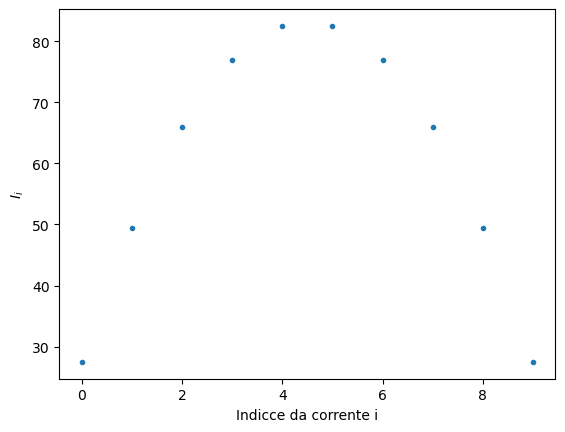

In [19]:
plt.plot(i, '.')
plt.xlabel("Indicce da corrente i")
plt.ylabel('$I_i$')

## Mudança de Base

Sejam duas bases B e C em um espaço vetorial. Queremos encontrar a matriz [A]ᶜᴮ que transforma as coordenadas de um vetor na base C para as coordenadas na base B.

[v]ᴮ = [A]ᶜᴮ [v]ᶜ

Para construir essa matriz, precisamos expressar cada vetor da base C como uma combinação linear dos vetores da base B. Cada uma dessas combinações lineares é um sistema linear a ser resolvido.



x = a_1 * b_1 + a_2 * b_2 + ... + a_n * b_n (na base B)
x = d_1 * c_1 + d_2 * c_2 + ... + d_n * c_n (na base C)

a = [a_1, a_2, ..., a_n]ᵀ -> x na base B
d = [d_1, d_2, ..., d_n]ᵀ -> x na base C

In [ ]:
d = X_bc @a

C = [c_1.T, c_2.T, .., c_n.T]

b_i = C @ x_i

In [36]:
def mb(B:list, C:list):
    C_mat = np.vstack(C).T
    X = []
    for b_i in B:
        x_i = la.solve(C_mat, b_i)
        X.append(x_i)

    X = np.vstack(X).T
    return X

In [28]:
def get_mat_MB(B,C):
    C_mat = np.vstack(C).T
    X = []

    for b in B:
        xi = la.solve(C_mat,b)
        X.append(xi)
    return np.vstack(X).T

In [43]:
# Definindo as bases B e C em R^2
# Base B (colunas da matriz A)
B_vec1 = np.array([1., 2])
B_vec2 = np.array([3., 4])

B = [B_vec1, B_vec2]

# Base C (vetores que queremos escrever em termos da base B)
C_vec1 = np.array([5., 6])
C_vec2 = np.array([7, 8])

C = [C_vec1, C_vec2]

A_bc = mb(B,C)
A_cb = mb(C,B)
print(A_bc)
print(A_cb)

x = B_vec1

x_c = A_bc @ x
print(x_c)

x_b = A_cb @ A_bc @ x

print(x_b)
print(A_bc@ A_cb)

[[ 3.  2.]
 [-2. -1.]]
[[-1. -2.]
 [ 2.  3.]]
[ 7. -4.]
[1. 2.]
[[ 1.0000000e+00 -8.8817842e-16]
 [-4.4408921e-16  1.0000000e+00]]


In [ ]:
B_mat = np.stack(B).T
C_mat = np.stack(C).T

A_bc = la.inv(B_mat)@C_mat # B^-1 C
print(A_bc)

[[-1. -2.]
 [ 2.  3.]]


## Matriz de transformação linear em diferentes bases:

Seja T uma transformação linear de um espaço vetorial V para U. Sejam $B_1$ e $B_2$ bases de V, e $C_1$ e $C_2$ bases de U. Seja [T]ᴮ¹ᶜ¹ a matriz de T em relação às bases $B_1$ e $C_1$, e [T]ᴮ²ᶜ² a matriz de T em relação às bases $B_2$ e $C_2$. A relação entre essas matrizes é dada por:

$[T]ᴮ²ᶜ² = Q^{-1} [T]ᴮ¹ᶜ¹ P$

onde P é a matriz de mudança de base de B_2 para B_1, e Q é a matriz de mudança de base de C_1 para C_2.